In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('Jalpan.TXT', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,NIVEL
0,25/01/2018,22:00,14,356,0.29,70.6,18.2,59,932.5,0.0,62.7,16.735
1,25/01/2018,23:00,3,357,5.28,67.0,17.7,61,932.9,0.0,21.8,16.737
2,26/01/2018,00:00,158,155,13.14,62.6,16.9,62,933.0,0.0,2.8,16.736
3,26/01/2018,01:00,167,158,5.76,70.9,16.2,71,933.3,0.0,0.0,16.732
4,26/01/2018,02:00,170,157,17.11,81.7,15.8,76,933.7,0.0,0.0,16.730


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RADSOL        float64
NIVEL         float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime( df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
# Lee los primeros 5 renglones del archivo
df.head()
df.tail()
# "Shift+Enter"

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,NIVEL,FECHA
159,100,176,3.91,53.3,8.2,100,928.5,0.0,13.5,16.747,2018-02-01 13:00:00
160,69,179,10.06,31.7,10.3,100,929.5,0.0,203.3,16.741,2018-02-01 14:00:00
161,145,166,10.91,34.6,13.7,90,930.2,0.0,330.3,16.740,2018-02-01 15:00:00
162,28,169,11.27,55.1,17.6,72,930.3,0.0,594.5,16.736,2018-02-01 16:00:00
163,101,175,5.45,52.9,20.9,58,929.6,0.0,730.7,16.734,2018-02-01 17:00:00


In [8]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,NIVEL
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.0,164.000000,164.000000
mean,137.835366,205.939024,9.431707,57.098171,15.504878,80.347561,932.492073,0.0,128.796951,16.729183
std,97.800741,90.771992,6.982523,14.616901,4.079348,20.511734,4.003832,0.0,225.356187,0.013924
min,0.000000,0.000000,0.290000,27.700000,7.400000,32.000000,925.200000,0.0,0.000000,16.700000
25%,57.750000,164.750000,3.890000,46.350000,12.900000,66.500000,929.275000,0.0,0.000000,16.716000
50%,151.000000,177.000000,8.115000,57.400000,15.750000,86.000000,932.500000,0.0,0.000000,16.733000
75%,168.000000,180.000000,13.967500,67.000000,17.725000,100.000000,934.625000,0.0,143.350000,16.741000
max,359.000000,359.000000,29.150000,104.400000,26.100000,100.000000,941.100000,0.0,839.500000,16.751000


In [9]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,NIVEL,FECHA
24,2,359,1.22,68.0,24.9,45,927.1,0.0,362.2,16.710,2018-01-26 22:00:00
45,10,161,6.99,66.2,24.4,48,927.6,0.0,725.5,16.700,2018-01-27 19:00:00
49,41,148,28.57,63.7,24.1,47,925.6,0.0,81.3,16.703,2018-01-27 23:00:00


In [10]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS      137.835366
DIRR      205.939024
VELS        9.431707
VELR       57.098171
TEMP       15.504878
HR         80.347561
PB        932.492073
PREC        0.000000
RADSOL    128.796951
NIVEL      16.729183
dtype: float64

In [11]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

15.504878048780483

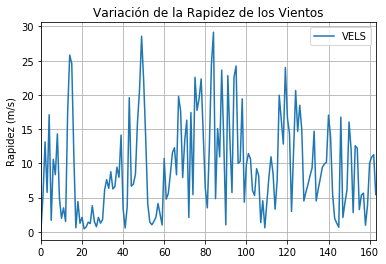

In [12]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

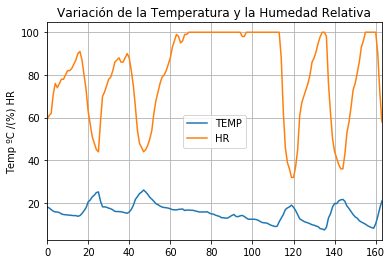

In [13]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

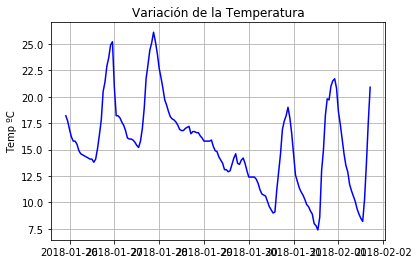

In [14]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

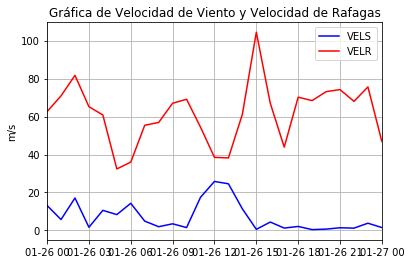

In [15]:
# Gráfica de Velocidad de Viento y Velocidad de Rafagas
plt.plot_date(x=df.FECHA, y=df.VELS, fmt="b-")
plt.plot_date(x=df.FECHA, y=df.VELR, fmt="r-")
plt.legend(loc='best')
plt.xlim(("26/01/2018 00:00","27/01/2018 00:00"))
plt.title("Gráfica de Velocidad de Viento y Velocidad de Rafagas")
plt.ylabel("m/s")
plt.grid(True)
plt.show()

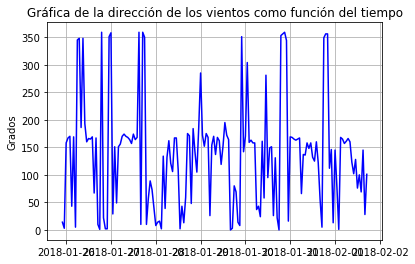

In [16]:
# Gráfica de la dirección de los vientos como función del tiempo
plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="b-")
plt.title("Gráfica de la dirección de los vientos como función del tiempo")
plt.ylabel("Grados")
plt.grid(True)
plt.show()

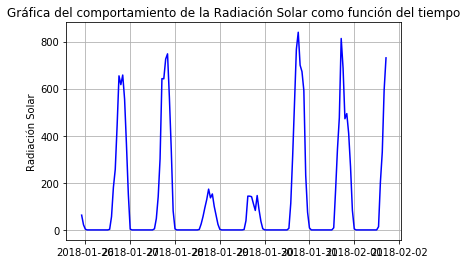

In [17]:
# Gráfica del comportamiento de la Radiación Solar como función del tiempo.
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="b-")
plt.title("Gráfica del comportamiento de la Radiación Solar como función del tiempo")
plt.ylabel("Radiación Solar")
plt.grid(True)
plt.show()

In [32]:
#Datos de un día
df_dia = df[df.FECHA >= '26/01/2018 00:00'] 
df_select = df_dia[df_dia.FECHA <'27/01/2018 00:00']
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,NIVEL,FECHA
2,158,155,13.14,62.6,16.9,62,933.0,0.0,2.8,16.736,2018-01-26 00:00:00
3,167,158,5.76,70.9,16.2,71,933.3,0.0,0.0,16.732,2018-01-26 01:00:00
4,170,157,17.11,81.7,15.8,76,933.7,0.0,0.0,16.730,2018-01-26 02:00:00
5,43,180,1.69,65.2,15.8,74,934.1,0.0,0.0,16.733,2018-01-26 03:00:00
6,169,180,10.60,60.8,15.5,76,934.2,0.0,0.0,16.734,2018-01-26 04:00:00
7,5,170,8.36,32.4,14.9,78,933.9,0.0,0.0,16.733,2018-01-26 05:00:00
8,345,325,14.31,36.0,14.6,78,933.9,0.0,0.0,16.732,2018-01-26 06:00:00
9,348,180,4.92,55.4,14.5,80,933.6,0.0,0.0,16.732,2018-01-26 07:00:00
10,186,180,1.98,56.9,14.4,82,933.1,0.0,0.0,16.730,2018-01-26 08:00:00
11,348,358,3.51,67.0,14.3,82,932.6,0.0,0.0,16.730,2018-01-26 09:00:00


In [33]:
Tmax=df_select.TEMP.max()
Tmax

25.199999999999999

In [34]:
Tmin=df_select.TEMP.min()
Tmin

13.800000000000001

In [36]:
DTemp=Tmax-Tmin
DTemp

11.399999999999999

In [37]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,NIVEL
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.0,164.000000,164.000000
mean,137.835366,205.939024,9.431707,57.098171,15.504878,80.347561,932.492073,0.0,128.796951,16.729183
std,97.800741,90.771992,6.982523,14.616901,4.079348,20.511734,4.003832,0.0,225.356187,0.013924
min,0.000000,0.000000,0.290000,27.700000,7.400000,32.000000,925.200000,0.0,0.000000,16.700000
25%,57.750000,164.750000,3.890000,46.350000,12.900000,66.500000,929.275000,0.0,0.000000,16.716000
50%,151.000000,177.000000,8.115000,57.400000,15.750000,86.000000,932.500000,0.0,0.000000,16.733000
75%,168.000000,180.000000,13.967500,67.000000,17.725000,100.000000,934.625000,0.0,143.350000,16.741000
max,359.000000,359.000000,29.150000,104.400000,26.100000,100.000000,941.100000,0.0,839.500000,16.751000
